## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the training data
train_data = pd.read_csv('/Users/rahulsharma/Developer/zelestra_challenge-2/dataset/train.csv')

print("\nDataset Shape:", train_data.shape)
print("\nColumns:", train_data.columns.tolist())
train_data


Dataset Shape: (20000, 17)

Columns: ['id', 'temperature', 'irradiance', 'humidity', 'panel_age', 'maintenance_count', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure', 'string_id', 'error_code', 'installation_type', 'efficiency']


,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,NaN,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122273332914,1018.3744670739436,B2,E02,tracking,0.664907
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.9769909288128159,1016.081102065643,D4,E00,fixed,0.354070
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937249871706,1009.6844614602336,D4,NaN,tracking,0.419734
19998,19998,NaN,632.760700,43.01470184078199,19.063517,4.0,NaN,0.000000,1.068906,21.149351,78.123689,11.304158443374758,1006.6738746072241,A1,E00,tracking,0.661963


Need to change datatypes of elements which are either float/integer but present as object
i.e Humidity, wind_speed, pressure

In [3]:
# Convert columns from object to numeric types
train_data['humidity'] = pd.to_numeric(train_data['humidity'], errors='coerce')
train_data['wind_speed'] = pd.to_numeric(train_data['wind_speed'], errors='coerce')
train_data['pressure'] = pd.to_numeric(train_data['pressure'], errors='coerce')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            19873 non-null  float64
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          19881 non-null  float64
 12  pressure            19865 non-null  float64
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

## Numerical Features Distribution and Correlation

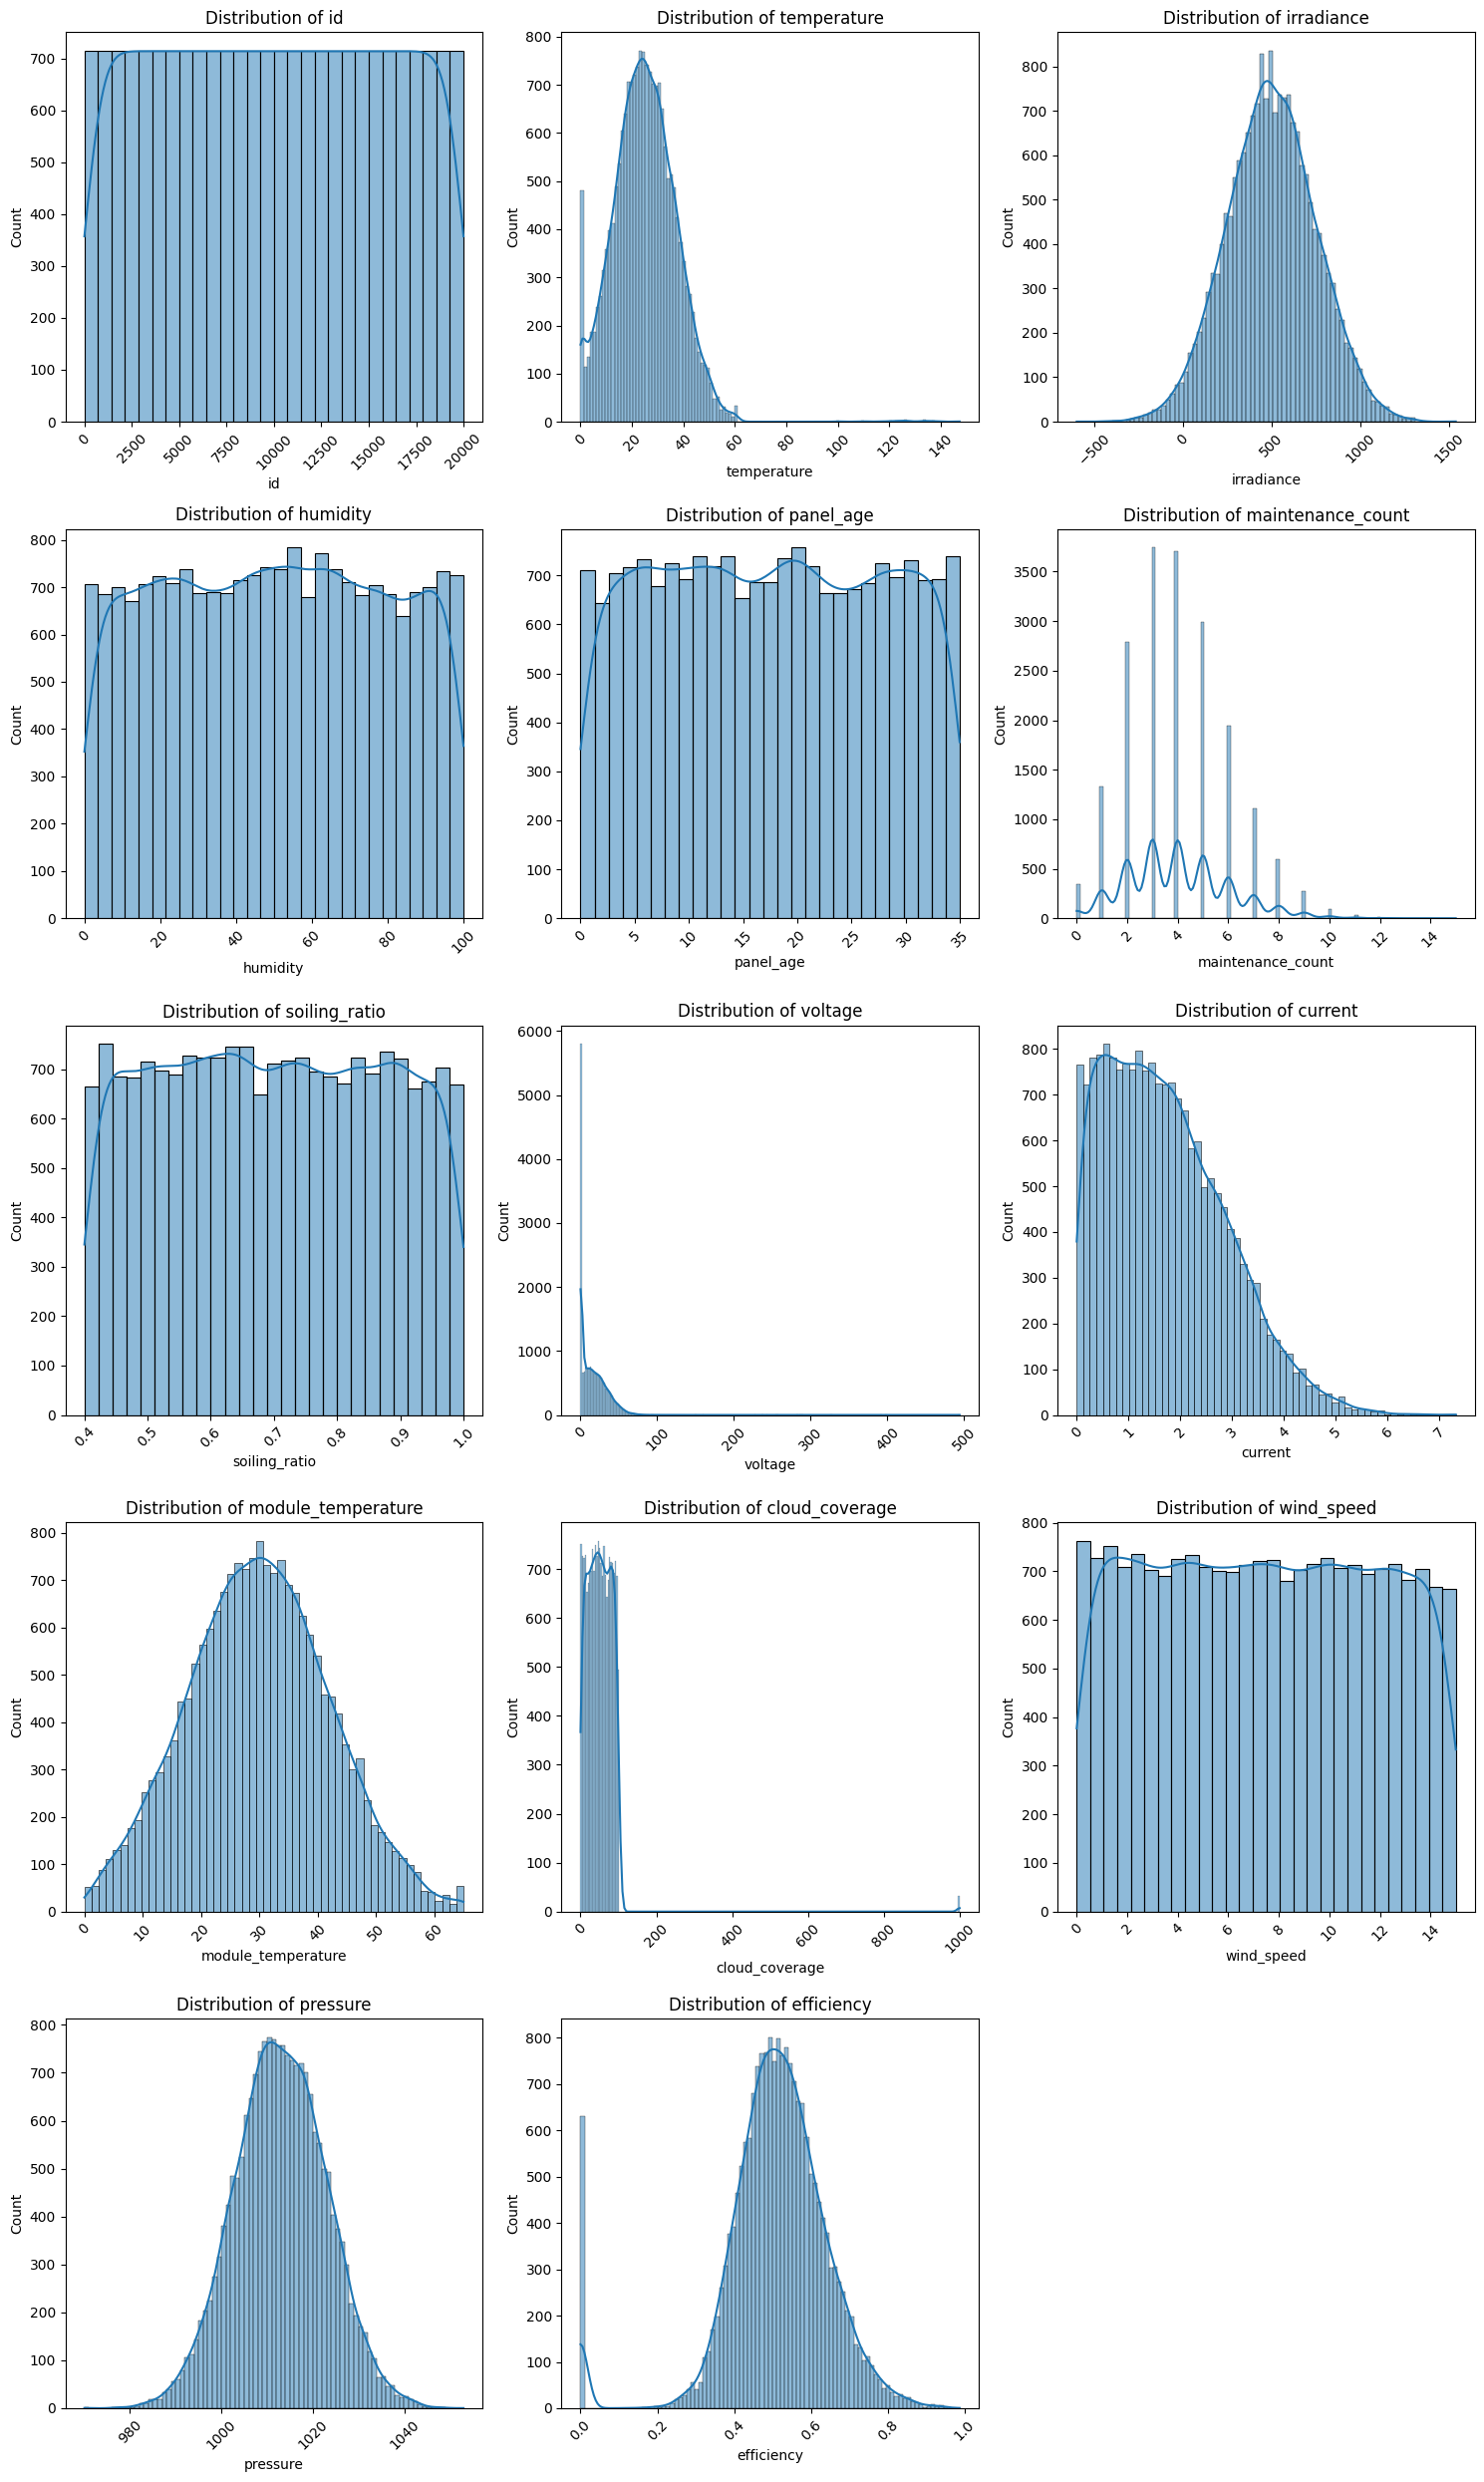

In [5]:
# Select numerical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Create distribution plots for numerical features
plt.figure(figsize=(15, 5 * ((len(numerical_cols) + 2) // 3)))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(((len(numerical_cols) + 2) // 3), 3, i)
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

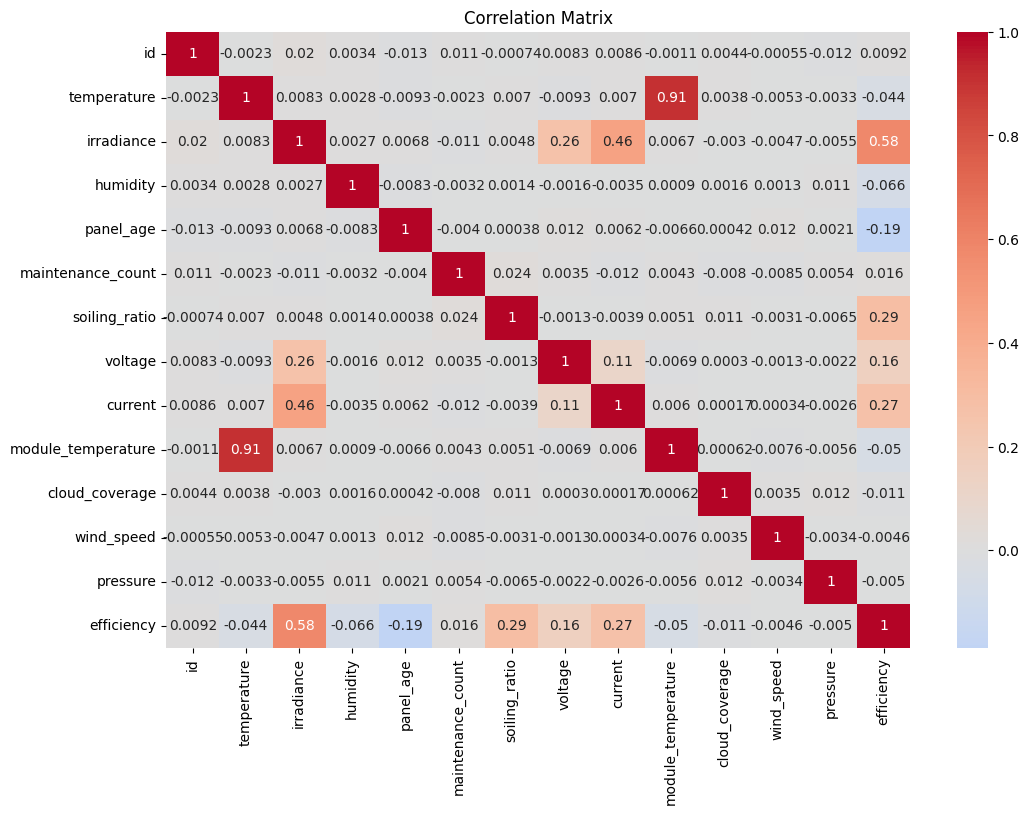

In [6]:
# Calculate correlation matrix for numerical features
correlation_matrix = train_data[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


## Handling Missing Values 
### 1. Panel Age

In [7]:
# Analyze panel_age by string_id, sorted by missing values
panel_age_analysis = train_data.groupby('string_id')['panel_age'].agg([
    'count',        
    lambda x: x.isnull().sum(), 
    lambda x: (x.isnull().sum() / len(x)) * 100,
    'mean',       
    'median',        
    'min',             
    'max'              
]).round(2)

# Rename columns for clarity
panel_age_analysis.columns = ['total_panels', 'missing_count', 'missing_pct', 'mean_age', 'median_age', 'min_age', 'max_age']

print("Panel Age Analysis by String ID:")
print("-" * 70)
print(panel_age_analysis)


Panel Age Analysis by String ID:
----------------------------------------------------------------------
           total_panels  missing_count  missing_pct  mean_age  median_age  \
string_id                                                                   
A1                 4662            240         4.90     17.86       17.90   
B2                 4748            266         5.31     17.62       17.64   
C3                 4763            241         4.82     17.31       17.14   
D4                 4816            264         5.20     17.26       17.28   

           min_age  max_age  
string_id                    
A1            0.01    34.99  
B2            0.02    35.00  
C3            0.00    34.99  
D4            0.00    35.00  


Missing percentages are very similar (~5%) across all strings
- Mean ages: 17.26-17.86 years
- All have panels ranging from ~0 to ~35 years
- Medians are close to means (normal distribution)


Since age distributions are similar, we could use group-wise median/mean imputation

In [8]:
# Fill missing panel_age with the median age of the same string_id
train_data['panel_age'] = train_data.groupby('string_id')['panel_age'].transform(
    lambda x: x.fillna(x.median())
)

# Verify that missing values are filled
print(train_data[train_data['panel_age'].isnull()])

Empty DataFrame
Columns: [id, temperature, irradiance, humidity, panel_age, maintenance_count, soiling_ratio, voltage, current, module_temperature, cloud_coverage, wind_speed, pressure, string_id, error_code, installation_type, efficiency]
Index: []


### 2. Handling Maintenance Count

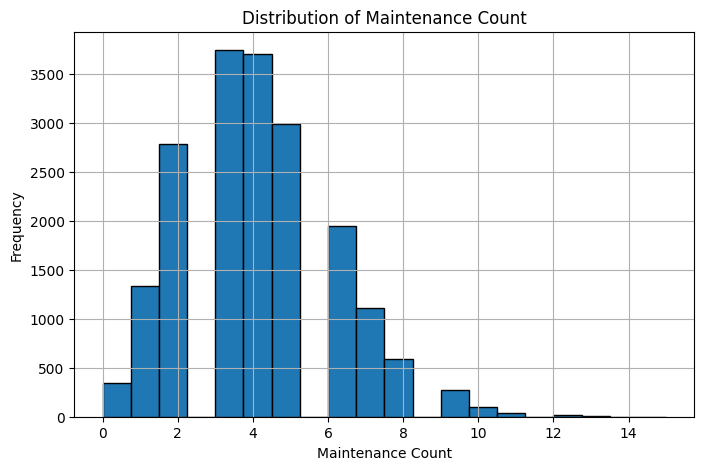

In [9]:
plt.figure(figsize=(8, 5))
train_data['maintenance_count'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Maintenance Count')
plt.xlabel('Maintenance Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Use error_code where available

In [10]:
# STEP 1: Calculate reference values for imputation
print(f"Initial missing values: {train_data['maintenance_count'].isna().sum()}")

# 1 Combined string_id + error_code median
error_string_median = train_data.groupby(['string_id', 'error_code'])['maintenance_count'].median()
print(f"String+Error combinations: {len(error_string_median)}")

# 2 Error code only median
error_code_median = train_data.groupby('error_code')['maintenance_count'].median()
print(f"Error code medians: {len(error_code_median)}")

# 3 String ID only median
string_id_median = train_data.groupby('string_id')['maintenance_count'].median()
print(f"String ID medians: {len(string_id_median)}")

# 4Overall median as final fallback
overall_median = train_data['maintenance_count'].median()
print(f"Overall median: {overall_median}")

Initial missing values: 1027
String+Error combinations: 12
Error code medians: 3
String ID medians: 4
Overall median: 4.0


In [11]:
#Sequential imputation (hierarchical approach)
# Level 1: Try string_id + error_code combination
missing_mask = train_data['maintenance_count'].isna()
level1_filled = 0

for idx in train_data[missing_mask].index:
    string_id = train_data.loc[idx, 'string_id']
    error_code = train_data.loc[idx, 'error_code']
    
    if pd.notna(error_code) and (string_id, error_code) in error_string_median:
        train_data.loc[idx, 'maintenance_count'] = error_string_median[(string_id, error_code)]
        level1_filled += 1

print(f"Level 1 (String+Error): Filled {level1_filled} values")
print(f"Remaining missing: {train_data['maintenance_count'].isna().sum()}")

Level 1 (String+Error): Filled 713 values
Remaining missing: 314


In [12]:
# Level 2: Fall back to error_code only
missing_mask = train_data['maintenance_count'].isna()
level2_filled = 0

for idx in train_data[missing_mask].index:
    error_code = train_data.loc[idx, 'error_code']
    
    if pd.notna(error_code) and error_code in error_code_median:
        train_data.loc[idx, 'maintenance_count'] = error_code_median[error_code]
        level2_filled += 1

print(f"Level 2 (Error only): Filled {level2_filled} values")
print(f"Remaining missing: {train_data['maintenance_count'].isna().sum()}")

Level 2 (Error only): Filled 0 values
Remaining missing: 314


In [13]:
# Level 3: Fall back to string_id only
missing_mask = train_data['maintenance_count'].isna()
level3_filled = 0

for idx in train_data[missing_mask].index:
    string_id = train_data.loc[idx, 'string_id']
    
    if string_id in string_id_median:
        train_data.loc[idx, 'maintenance_count'] = string_id_median[string_id]
        level3_filled += 1

print(f"Level 3 (String only): Filled {level3_filled} values")
print(f"Remaining missing: {train_data['maintenance_count'].isna().sum()}")

Level 3 (String only): Filled 314 values
Remaining missing: 0


### 3. Handling Soiling Ratio

Strategy: Maintenance-based imputation

Logic: Higher maintenance count indicates dirtier panels (higher soiling ratio)
Implementation:

Group maintenance counts into 5 bins
Use median soiling ratio for each maintenance bin
Fall back to overall median if maintenance count is also missing


Rationale: Strong relationship observed (low maintenance: 0.695 soiling → high maintenance: 0.790 soiling)

In [14]:
print(f"Initial missing values: {train_data['soiling_ratio'].isna().sum()}")

# Create maintenance-based soiling reference
maintenance_bins = pd.cut(train_data['maintenance_count'], bins=5, include_lowest=True)
maintenance_soiling_median = train_data.groupby(maintenance_bins)['soiling_ratio'].median()

print("Maintenance bins and corresponding soiling medians:")
print(maintenance_soiling_median)

# Fill missing soiling_ratio based on maintenance_count
missing_soiling_mask = train_data['soiling_ratio'].isna()
filled_count = 0

for idx in train_data[missing_soiling_mask].index:
    maintenance_val = train_data.loc[idx, 'maintenance_count']
    
    if pd.notna(maintenance_val):
        # Find which bin this maintenance value falls into
        for bin_range, median_soiling in maintenance_soiling_median.items():
            if maintenance_val >= bin_range.left and maintenance_val <= bin_range.right:
                train_data.loc[idx, 'soiling_ratio'] = median_soiling
                filled_count += 1
                break

print(f"Filled using maintenance approach: {filled_count} values")

# Fill remaining with overall median (if maintenance_count was also missing)
remaining_missing = train_data['soiling_ratio'].isna().sum()
if remaining_missing > 0:
    overall_median = train_data['soiling_ratio'].median()
    train_data['soiling_ratio'] = train_data['soiling_ratio'].fillna(overall_median)
    print(f"Filled remaining with overall median: {remaining_missing} values")

print(f"Final missing values: {train_data['soiling_ratio'].isna().sum()}")

Initial missing values: 1010
Maintenance bins and corresponding soiling medians:
maintenance_count
(-0.016, 3.0]    0.691583
(3.0, 6.0]       0.701549
(6.0, 9.0]       0.704006
(9.0, 12.0]      0.712903
(12.0, 15.0]     0.826882
Name: soiling_ratio, dtype: float64
Filled using maintenance approach: 1010 values
Final missing values: 0


/var/folders/pm/1bfdvzwx4pxgpjw04gl_zzc00000gn/T/ipykernel_56562/313262003.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  maintenance_soiling_median = train_data.groupby(maintenance_bins)['soiling_ratio'].median()


### 4. Handling Module Temperature

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

def impute_module_temperature(train_data):
    """
    Iputation of module_temperature missing values
    Returns train_data with no missing values in module_temperature
    """
    df = train_data.copy()
    
    # STAGE 1: Linear Regression using temperature (best predictor)
    if 'temperature' in df.columns:
        # Convert to numeric, coercing errors to NaN
        temp_numeric = pd.to_numeric(df['temperature'], errors='coerce')
        module_temp_numeric = pd.to_numeric(df['module_temperature'], errors='coerce')
        
        # Get available training data
        train_mask = module_temp_numeric.notna() & temp_numeric.notna()
        if train_mask.sum() > 10:  # Need at least 10 samples
            lr = LinearRegression()
            lr.fit(temp_numeric[train_mask].values.reshape(-1, 1), 
                   module_temp_numeric[train_mask])
            
            # Predict missing values where temperature exists
            predict_mask = module_temp_numeric.isna() & temp_numeric.notna()
            df.loc[predict_mask, 'module_temperature'] = lr.predict(
                temp_numeric[predict_mask].values.reshape(-1, 1))
    
    # STAGE 2: KNN using only numeric features
    if df['module_temperature'].isna().any():
        # Select numeric features only
        numeric_features = df.select_dtypes(include=['number']).columns.tolist()
        features_to_use = [f for f in numeric_features if f != 'module_temperature']
        
        if features_to_use:  # If we have any numeric features to use
            # Convert to numeric, coercing errors to NaN
            df_numeric = df[['module_temperature'] + features_to_use].apply(
                pd.to_numeric, errors='coerce')
            
            imputer = KNNImputer(n_neighbors=5)
            imputed_values = imputer.fit_transform(df_numeric)
            df['module_temperature'] = imputed_values[:, 0]
    
    # STAGE 3: Final guarantee - fill any remaining with median
    if df['module_temperature'].isna().any():
        median_val = pd.to_numeric(df['module_temperature'], errors='coerce').median()
        df['module_temperature'] = pd.to_numeric(df['module_temperature'], errors='coerce')
        df['module_temperature'].fillna(median_val, inplace=True)
    
    # Verify no missing values remain
    assert df['module_temperature'].isna().sum() == 0, "Imputation failed!"
    
    return df

# Usage:
train_data = impute_module_temperature(train_data)

In [16]:
print(f"Final missing values: {train_data['module_temperature'].isna().sum()}")

Final missing values: 0


### Handling Current and Voltage

voltage    993
current    977
dtype: int64


<Axes: xlabel='voltage', ylabel='current'>

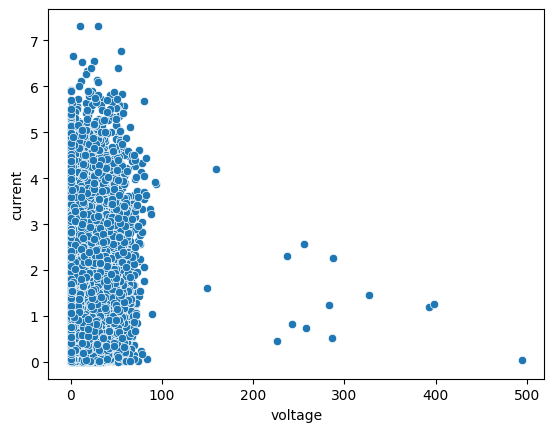

In [17]:
print(train_data[['voltage', 'current']].isna().sum())
sns.scatterplot(x='voltage', y='current', data=train_data)

In [18]:
print(train_data[train_data['voltage'] > 150])
train_data.loc[train_data['voltage'] > 150, 'voltage'] = np.nan
train_data.loc[train_data['current'] > 10, 'current'] = np.nan

          id  temperature  irradiance   humidity  panel_age  \
1221    1221    20.506195  822.640941  32.315125  11.886095   
1956    1956    15.023553  727.015711  23.788048  34.404818   
7727    7727    37.119274  872.409523  25.574003  31.150380   
8075    8075    49.365309  282.847102  88.362884  30.716954   
10739  10739     9.970169  200.631851  80.937636   4.381849   
11096  11096    17.262097  555.809484  87.537487  29.753130   
11982  11982    24.495467  183.699991  17.217168   8.470157   
12777  12777    42.204545  500.672707  29.802584   4.043519   
14653  14653    12.099439  307.616255  89.606678  30.565117   
15084  15084    11.755913  726.342010  45.452532  18.998332   
16532  16532     9.659586  439.962777  46.022208  25.855040   
16566  16566     9.895438  522.852443  10.159713  29.392335   
16812  16812          NaN  475.301351  85.450713  13.978687   

       maintenance_count  soiling_ratio     voltage   current  \
1221                 5.0       0.959956  236.765061 

In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Define the columns you want to impute
impute_cols = ['voltage', 'current']

# Extract the specific columns for imputation
impute_df = train_data[impute_cols]

# Standardize the data before KNN imputation
scaler = StandardScaler()
impute_scaled = scaler.fit_transform(impute_df)

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
impute_imputed = imputer.fit_transform(impute_scaled)

# Inverse scaling to get back to the original scale
impute_filled = scaler.inverse_transform(impute_imputed)

# Create a DataFrame with the imputed data
impute_filled_df = pd.DataFrame(impute_filled, columns=impute_cols)

# Replace the original voltage and current columns with the imputed ones
train_data[impute_cols] = impute_filled_df[impute_cols]

In [20]:
print(train_data[['voltage', 'current']].isna().sum())

voltage    0
current    0
dtype: int64


### Power - Feature Generation

In [21]:
def add_power_feature_simple(train_data):
    current = pd.to_numeric(train_data['current'], errors='coerce')
    voltage = pd.to_numeric(train_data['voltage'], errors='coerce')

    power = current * voltage
    train_data = train_data.copy()
    train_data['power'] = power
    return train_data

train_data = add_power_feature_simple(train_data)

In [22]:
print(f"Final missing values: {train_data['power'].isna().sum()}")

Final missing values: 0


### 6. Handling Irradiance

In [23]:
from sklearn.impute import KNNImputer

def impute_irradiance(train_data):
    """
    Simplified irradiance imputation handling:
    - NaN values
    - Zero values
    Returns dataframe with clean irradiance values.
    """
    df = train_data.copy()
    irradiance = pd.to_numeric(df['irradiance'], errors='coerce')

    # Identify values to impute (NaNs and zeros)
    to_impute = (irradiance == 0) | irradiance.isna()

    # If nothing to impute, return early
    if not to_impute.any():
        df['irradiance'] = irradiance
        return df

    # 1 Estimate irradiance from power and efficiency if available
    if all(col in df.columns for col in ['power', 'efficiency']):
        power = pd.to_numeric(df['power'], errors='coerce')
        efficiency = pd.to_numeric(df['efficiency'], errors='coerce')
        estimated_irradiance = power / (efficiency + 0.0001)

        plausible_mask = (estimated_irradiance > 0) & (estimated_irradiance < 1500)
        irradiance[to_impute & plausible_mask] = estimated_irradiance[to_impute & plausible_mask]

    # 2 KNN imputation using relevant features
    relevant_features = ['temperature', 'module_temperature', 'humidity', 'cloud_coverage']
    use_features = [f for f in relevant_features if f in df.columns]

    if use_features:
        knn_data = df[use_features].apply(pd.to_numeric, errors='coerce')
        knn_data['irradiance'] = irradiance

        imputer = KNNImputer(n_neighbors=5)
        imputed_values = imputer.fit_transform(knn_data)
        irradiance[to_impute] = imputed_values[to_impute, -1]

    # 3: Final cleanup
    irradiance = np.clip(irradiance, 0, 1500)
    if irradiance.isna().any():
        irradiance.fillna(irradiance.median(), inplace=True)

    df['irradiance'] = irradiance

    # Verify no missing or unreasonable values
    assert not df['irradiance'].isna().any(), "Still has missing values!"
    assert (df['irradiance'] >= 0).all(), "Negative irradiance found!"

    return df

# Usage:
train_data = impute_irradiance(train_data)


In [24]:
print(f"Final missing values: {train_data['irradiance'].isna().sum()}")

Final missing values: 0


### 7. Handling Humidity

In [25]:
from sklearn.impute import KNNImputer

def impute_humidity(train_data):
    """
    Imputation handling for humidity:
    - NaN values
    - Zero values
    Returns dataframe with clean humidity values
    """
    # Make a copy to avoid modifying the original dataframe
    df = train_data.copy()

    # Convert to numeric, forcing non-numeric to NaN
    humidity = pd.to_numeric(df['humidity'], errors='coerce')

    # Mark zero values that need imputation
    zero_mask = (humidity == 0)

    # Combine zeros and NaN for imputation
    to_impute = zero_mask | humidity.isna()

    # If nothing to impute, return early
    if not to_impute.any():
        df['humidity'] = humidity
        return df

    # STAGE 1: KNN imputation with most relevant features
    relevant_features = ['temperature', 'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure']

    # Only use features that exist and have data
    use_features = [f for f in relevant_features if f in df.columns]

    if use_features:
        # Prepare data - convert all to numeric
        knn_data = df[use_features].apply(pd.to_numeric, errors='coerce')
        knn_data['humidity'] = humidity

        # Impute
        imputer = KNNImputer(n_neighbors=5)
        imputed = imputer.fit_transform(knn_data)

        # Only update values we wanted to impute
        humidity[to_impute] = imputed[to_impute, -1]  # Last column is humidity

    # STAGE 2: Final cleanup - replace any remaining bad values
    # Set reasonable physical bounds for humidity (0-100%)
    humidity = np.clip(humidity, 0, 100)

    # If any remain missing (unlikely), fill with median
    if humidity.isna().any():
        humidity.fillna(humidity.median(), inplace=True)

    # Update dataframe
    df['humidity'] = humidity

    # Verify no missing or unreasonable values
    assert not df['humidity'].isna().any(), "Still has missing values!"
    assert (df['humidity'] >= 0).all() and (df['humidity'] <= 100).all(), "Humidity out of bounds!"

    return df

# Usage:
train_data = impute_humidity(train_data)

In [26]:
print(f"Final missing values: {train_data['humidity'].isna().sum()}")

Final missing values: 0


### 8. Handling Error Code

In [27]:
def impute_error_code(train_data):
    """
    Imputation handling for error_code:
    - Missing values are imputed with a new category 'Unknown'
    Returns dataframe with imputed error_code values
    """
    # Make a copy to avoid modifying the original dataframe
    df = train_data.copy()

    # Directly assign the result of fillna back to the column
    df['error_code'] = df['error_code'].fillna('Unknown')

    return df

# Usage:
train_data = impute_error_code(train_data)

In [28]:
print(f"Final missing values: {train_data['error_code'].isna().sum()}")

Final missing values: 0


### Temperature

In [29]:
# Select relevant features for KNN imputation
features = ['temperature', 'humidity', 'module_temperature', 'irradiance', 'cloud_coverage']
df = train_data[features]

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Update the original DataFrame with the imputed temperature values
train_data['temperature'] = df_imputed['temperature']

In [30]:
print(f"Final missing values: {train_data['temperature'].isna().sum()}")

Final missing values: 0


### Handling Cloud Coverage

In [31]:
# Select relevant features for KNN imputation
features = ['cloud_coverage', 'temperature', 'humidity', 'irradiance', 'module_temperature']
df = train_data[features]

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Update the original DataFrame with the imputed cloud_coverage values
train_data['cloud_coverage'] = df_imputed['cloud_coverage']

In [32]:
print(f"Final missing values: {train_data['cloud_coverage'].isna().sum()}")

Final missing values: 0


### Handling Wind Speed

In [33]:
# Select relevant features for KNN imputation
features = ['wind_speed', 'temperature', 'humidity', 'pressure', 'cloud_coverage']
df = train_data[features]

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Update the original DataFrame with the imputed wind_speed values
train_data['wind_speed'] = df_imputed['wind_speed']

In [34]:
print(f"Final missing values: {train_data['wind_speed'].isna().sum()}")


Final missing values: 0


### Handling Pressure

In [35]:
# Select relevant features for KNN imputation
features = ['pressure', 'temperature', 'humidity', 'wind_speed', 'cloud_coverage']
df = train_data[features]

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Update the original DataFrame with the imputed pressure values
train_data['pressure'] = df_imputed['pressure']

print(f"Final missing values: {train_data['pressure'].isna().sum()}")

Final missing values: 0


### Handling Installation Type

In [40]:
train_data['installation_type'] = train_data['installation_type'].fillna('Unknown')

### Adjusted Irradiance - Feature Generation

In [43]:
train_data['adjusted_irradiance'] = train_data['irradiance'] * train_data['soiling_ratio']

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20000 non-null  int64  
 1   temperature          20000 non-null  float64
 2   irradiance           20000 non-null  float64
 3   humidity             20000 non-null  float64
 4   panel_age            20000 non-null  float64
 5   maintenance_count    20000 non-null  float64
 6   soiling_ratio        20000 non-null  float64
 7   voltage              20000 non-null  float64
 8   current              20000 non-null  float64
 9   module_temperature   20000 non-null  float64
 10  cloud_coverage       20000 non-null  float64
 11  wind_speed           20000 non-null  float64
 12  pressure             20000 non-null  float64
 13  string_id            20000 non-null  object 
 14  error_code           20000 non-null  object 
 15  installation_type    20000 non-null 

### Categorical Columns To Numbers

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert string_id to numbers
train_data['string_id_encoded'] = label_encoder.fit_transform(train_data['string_id'])

# Convert error_code to numbers
train_data['error_code_encoded'] = label_encoder.fit_transform(train_data['error_code'])

# Convert installation_type to numbers
train_data['installation_type_encoded'] = label_encoder.fit_transform(train_data['installation_type'])

# Drop the original categorical columns
train_data = train_data.drop(['string_id', 'error_code', 'installation_type'], axis=1)

print("Done! train_data modified - all categorical columns converted to numbers")
print(f"New shape: {train_data.shape}")
print(f"Data types:\n{train_data.dtypes}")

Done! train_data modified - all categorical columns converted to numbers
New shape: (20000, 19)
Data types:
id                             int64
temperature                  float64
irradiance                   float64
humidity                     float64
panel_age                    float64
maintenance_count            float64
soiling_ratio                float64
voltage                      float64
current                      float64
module_temperature           float64
cloud_coverage               float64
wind_speed                   float64
pressure                     float64
efficiency                   float64
power                        float64
adjusted_irradiance          float64
string_id_encoded              int64
error_code_encoded             int64
installation_type_encoded      int64
dtype: object


### Scale your ENTIRE train_data and save it

In [46]:
from sklearn.preprocessing import StandardScaler

# Keep id and efficiency separate (don't scale these)
id_column = train_data['id']
efficiency_column = train_data['efficiency']

# Get all other columns to scale
columns_to_scale = train_data.drop(['id', 'efficiency'], axis=1)

print(f"Columns to scale: {columns_to_scale.shape}")

# Scale all the feature columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(columns_to_scale)

# Convert back to DataFrame with column names
scaled_features_df = pd.DataFrame(scaled_features, columns=columns_to_scale.columns)

# Put everything back together
train_data_scaled = pd.concat([
    id_column.reset_index(drop=True),
    scaled_features_df.reset_index(drop=True), 
    efficiency_column.reset_index(drop=True)
], axis=1)

# Save the scaled data to CSV
train_data_scaled.to_csv('train_data_scaled.csv', index=False)

print("✅ Done! Scaled data saved as 'train_data_scaled.csv'")
print(f"Final shape: {train_data_scaled.shape}")
print(f"Columns: {list(train_data_scaled.columns)}")

# Now train_data_scaled is ready for machine learning!

Columns to scale: (20000, 17)
✅ Done! Scaled data saved as 'train_data_scaled.csv'
Final shape: (20000, 19)
Columns: ['id', 'temperature', 'irradiance', 'humidity', 'panel_age', 'maintenance_count', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure', 'power', 'adjusted_irradiance', 'string_id_encoded', 'error_code_encoded', 'installation_type_encoded', 'efficiency']
